# Курсовой проект по дисциплине: Теория вероятностей и математическая статистика

## Задание для курсового проекта:

Выбрать тему для курсового проекта. Курсовой по желанию. Данные с kaggle.com

**Варианты тем:**

1.EDA (рассчитать описательные статистики+ графический анализ с выводами)

2.Тестирование гипотезы (условия применимости того или иного критерия проверить , можно с графиками+ провести тестирование, оформить вывод)

3.Линейная регрессия (условия применимости метода проверить ,можно с графиками, построить модель, исследовать на статистическую значимость модель ,можно и коэффициенты (самостоятельное изучение), коэффициент детерминации)

4.Однофакторный или двухфакторный дисперсионный анализ (обязательно условия применимости исследовать, провести анализ, оформить вывод)

Требования к оформлению : название темы, сопроводительный текст к действиям, что и почему делаете, какой вывод.
Срок сдачи -до 07.09.21

**Был выбран датасет:** Fish market. Database of common fish species for fish market

**Ссылка на датасет:** https://www.kaggle.com/aungpyaeap/fish-market

**Описание датасета:** Этот набор данных представляет собой отчет о 7 наиболее распространенных различных видах рыб, продаваемых на рыбном рынке. С помощью этого набора данных можно выполнить прогнозную модель с использованием машинно-ориентированных данных и оценить вес рыбы.

**Столбцы датасета:**
- Species - Видовое название рыбы
- Weight - вес рыбы в граммах
- Length1 - длина по вертикали в см
- Length2 - длина диагонали в см
- Length3 - поперечная длина в см
- Height - высота в см
- Width - ширина по диагонали в см

In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

Загрузим датасет и посмотрим первые его 10 столбцов:

In [3]:
DATASET_PATH = './Fish.csv'
df = pd.read_csv(DATASET_PATH)

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


Выведем информацию о датасете:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


Видно, что датасет имеет 159 строк, пропусков в столбцах нет.

Посмотрим, сколько измерений приходится на каждый вид рыбы:

In [6]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

Видим, что большее количество строк у окуня - 56. Для задачи линейной регрессии будем исследовать именно его.

Можно было бы предсказывать вес рыбы для всего датасета. Но тогда необходимо перевести категориальную переменную 'Species' в 7 dummy-переменных. При этом 7 лишних признаков заметно увеличат среднеквадратичную ошибку модели линейной регрессии. Но с такой задачей без потерь справилось бы дерево решений.

In [7]:
df2 = df.loc[df['Species'] == 'Perch']
df2.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
72,Perch,5.9,7.5,8.4,8.8,2.1120,1.4080
73,Perch,32.0,12.5,13.7,14.7,3.5280,1.9992
74,Perch,40.0,13.8,15.0,16.0,3.8240,2.4320
75,Perch,51.5,15.0,16.2,17.2,4.5924,2.6316
76,Perch,70.0,15.7,17.4,18.5,4.5880,2.9415


## 1. EDA

Выведем описательные статистики:

In [8]:
df2.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
std,347.617717,8.561572,9.021668,9.529509,2.878177,1.774626
min,5.900000,7.500000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,19.825000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,23.250000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,34.125000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,41.100000,44.000000,46.600000,12.800200,8.142000


Видим, что для всех признаков средние значения не сильно отличаются от медиан, кроме таргета - веса рыбы.

Построим графики распределений для каждого признака, причем укажем на каждом графике следующие описательные статистики:

- медиану
- среднее арифметическое
- интервал от $\overline{X}-\sigma$ до $\overline{X}+\sigma$

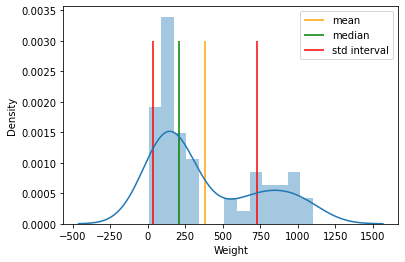

In [9]:
sns.distplot(df2.Weight, bins=13)
plt.vlines(df2.Weight.mean(), 0,0.0030, color='orange', label='mean')
plt.vlines(df2.Weight.median(), 0,0.0030, color='green', label='median')
plt.vlines(df2.Weight.mean() - df2.Weight.std(), 0,0.0030, color='red', label='std interval')
plt.vlines(df2.Weight.mean() + df2.Weight.std(), 0,0.0030, color='red')
plt.legend()
plt.show()

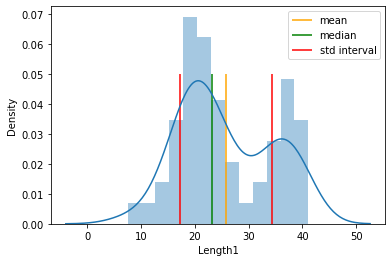

In [10]:
sns.distplot(df2.Length1, bins=13)
plt.vlines(df2.Length1.mean(), 0,0.05, color='orange', label='mean')
plt.vlines(df2.Length1.median(), 0,0.05, color='green', label='median')
plt.vlines(df2.Length1.mean() - df2.Length1.std(), 0,0.05, color='red', label='std interval')
plt.vlines(df2.Length1.mean() + df2.Length1.std(), 0,0.05, color='red')
plt.legend()
plt.show()

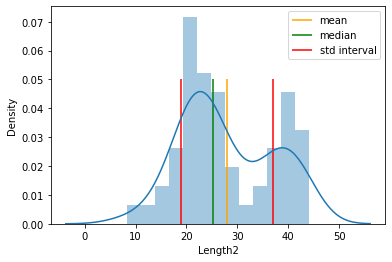

In [11]:
sns.distplot(df2.Length2, bins=13)
plt.vlines(df2.Length2.mean(), 0,0.05, color='orange', label='mean')
plt.vlines(df2.Length2.median(), 0,0.05, color='green', label='median')
plt.vlines(df2.Length2.mean() - df2.Length2.std(), 0,0.05, color='red', label='std interval')
plt.vlines(df2.Length2.mean() + df2.Length2.std(), 0,0.05, color='red')
plt.legend()
plt.show()

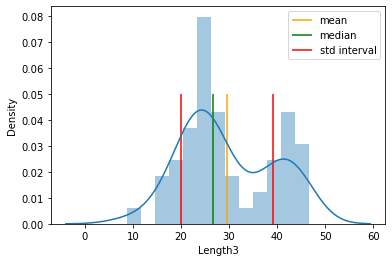

In [12]:
sns.distplot(df2.Length3, bins=13)
plt.vlines(df2.Length3.mean(), 0,0.05, color='orange', label='mean')
plt.vlines(df2.Length3.median(), 0,0.05, color='green', label='median')
plt.vlines(df2.Length3.mean() - df2.Length3.std(), 0,0.05, color='red', label='std interval')
plt.vlines(df2.Length3.mean() + df2.Length3.std(), 0,0.05, color='red')
plt.legend()
plt.show()

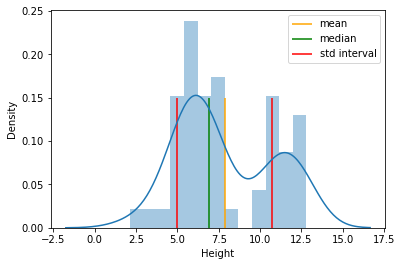

In [13]:
sns.distplot(df2.Height, bins=13)
plt.vlines(df2.Height.mean(), 0,0.15, color='orange', label='mean')
plt.vlines(df2.Height.median(), 0,0.15, color='green', label='median')
plt.vlines(df2.Height.mean() - df2.Height.std(), 0,0.15, color='red', label='std interval')
plt.vlines(df2.Height.mean() + df2.Height.std(), 0,0.15, color='red')
plt.legend()
plt.show()

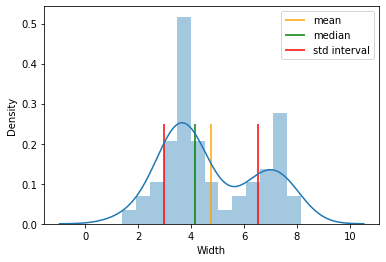

In [14]:
sns.distplot(df2.Width, bins=13)
plt.vlines(df2.Width.mean(), 0,0.25, color='orange', label='mean')
plt.vlines(df2.Width.median(), 0,0.25, color='green', label='median')
plt.vlines(df2.Width.mean() - df2.Width.std(), 0,0.25, color='red', label='std interval')
plt.vlines(df2.Width.mean() + df2.Width.std(), 0,0.25, color='red')
plt.legend()
plt.show()

**Выводы по графикам распределения:**

Для каждого признака мы видим бимодальное распределение - большие частоты распределения по краям диапазона значений. Вследствие этого среднее арифметическое находится правее первой наибольшей моды и медианного значения. При этом такие параметры, как длина, ширина, вес и т.д. в живой природе обычно подчиняются нормальному распределению. Значит, данная выборка нерепрезентативна вследствие малого количества измерений в выборке - рыб со средними параметрами в распределении в выборку не взяли.

Теперь построим диаграмму разброса каждого признака относительно таргета - веса рыбы:

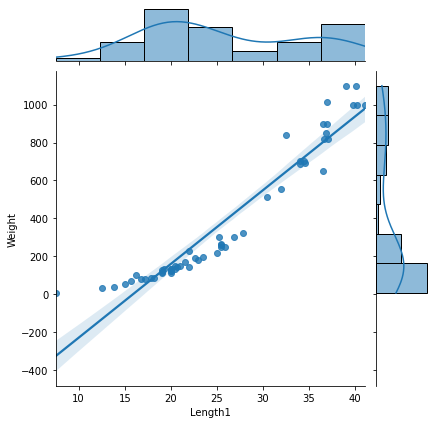

In [15]:
sns.jointplot(df2['Length1'], df2['Weight'], kind='reg')

plt.show()

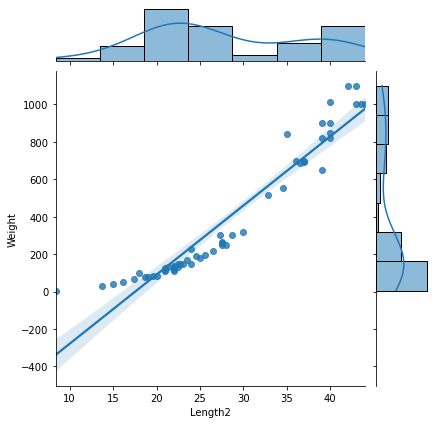

In [16]:
sns.jointplot(df2['Length2'], df2['Weight'], kind='reg')

plt.show()

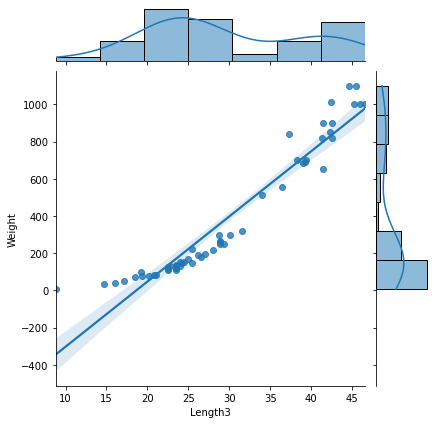

In [17]:
sns.jointplot(df2['Length3'], df2['Weight'], kind='reg')

plt.show()

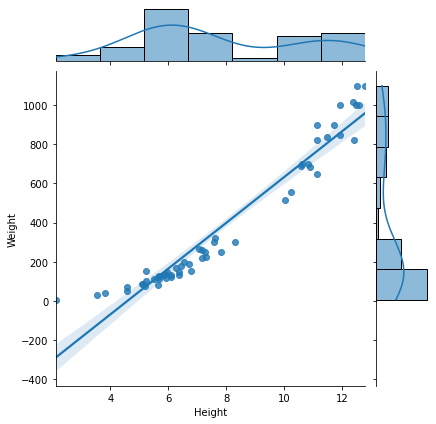

In [18]:
sns.jointplot(df2['Height'], df2['Weight'], kind='reg')

plt.show()

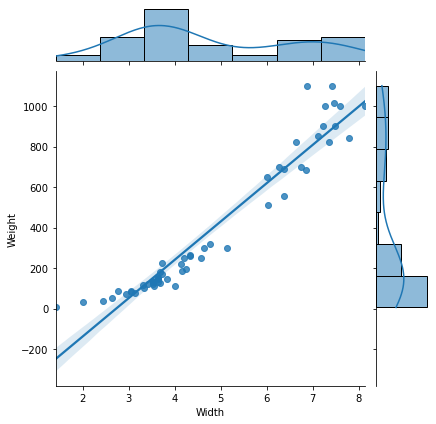

In [19]:
sns.jointplot(df2['Width'], df2['Weight'], kind='reg')

plt.show()

**Выводы по диаграммам разброса:**

- Вид зависимости каждого параметра от таргета практически одинаков. Это говорит об очень сильной корелляции между признаками.
- Данная зависимость хорошо бы могла аппроксимироваться полиномом второго порядка или показательной функцией. Но и линейной фунцией эта зависимость аппроксимируется неплохо. Единственный минус - отрицательный интерсепт. То есть при использовании интерсепта в линейной регрессии мы будем получать отрицательные предсказанные значения веса рыбы.

Построим таблицу корелляций признаков между собой:

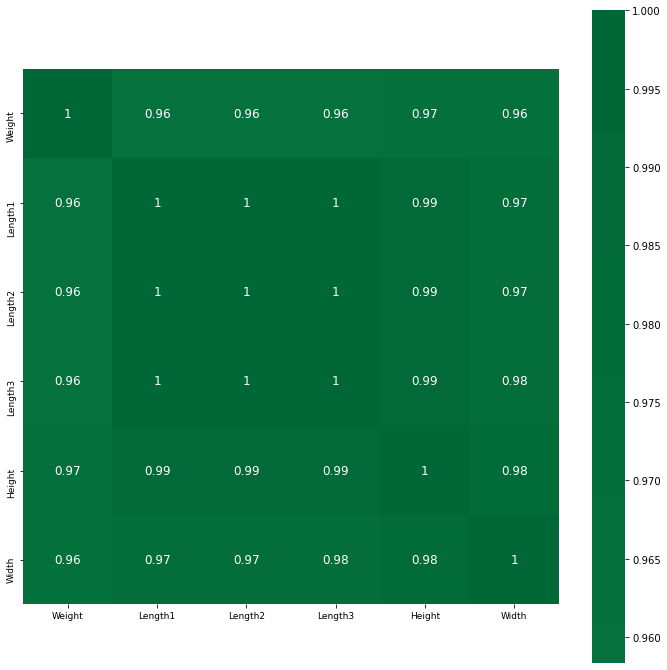

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(df2.corr(), xticklabels=df2.corr().columns, yticklabels=df2.corr().columns, 
            cmap='RdYlGn', annot=True, annot_kws = { "size" : 12 }, fmt='.2g', square=True, center=0)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

**Выводы по таблице корелляций:**

Как и было сказано выше, все признаки действительно очень сильно кореллируют между собой. Причем корелляция таргета с признаками также очень высокая. Все это говорит о том, что к данной выборке применима линейная регрессия.

## 2. Линейная регрессия

Применим метод линейной регрессии к данным, использовав встроенный класс из библиотеки sklearn.

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr = LinearRegression()

Разобьем выборку на признаки Х, удалив категориальный признак 'Species', и на искомый параметр у:

In [23]:
X = df2.drop(columns=['Weight', 'Species'])
y = df2['Weight']

Обучим линейную модель:

In [24]:
lr.fit(X, y)

LinearRegression()

Получим вектор оценочных значений:

In [25]:
y_pred = lr.predict(X)

Импортируем метрики - коэффициент детерминации и среднюю квадратическую ошибку:

In [26]:
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [27]:
# Функция визуализации для моделей регрессии - строит график разброса истинных и оценочных значений
def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)))
    print("MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([true_values.min(), true_values.max()], [true_values.min(), true_values.max()], linestyle='--', color='black')
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Sample prediction')

    plt.show()

Построим график разброса оценочных значений относительно истинных. Черная пунктирная линия - график идеального случая при MSE = 0, т.е линия, где оценочные значения равны истинным.

Также выведем значения коэффициентов линейной модели и интерсепта.

R2:	0.943
MSE:	6774.447


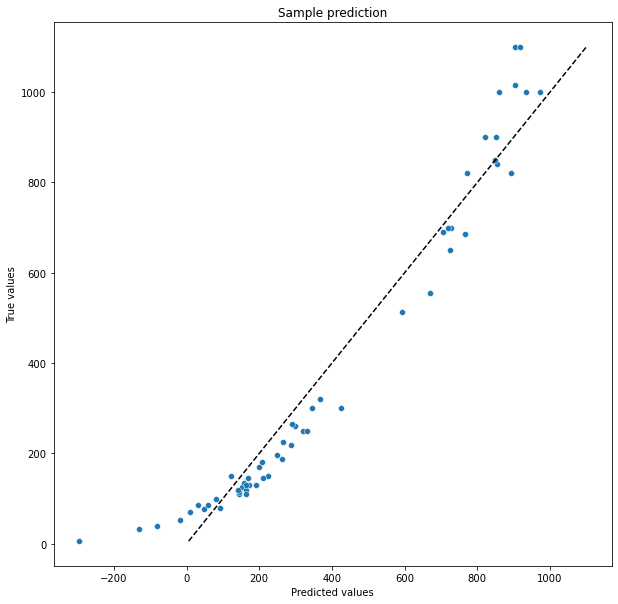

In [28]:
evaluate_preds(y, y_pred)

In [29]:
lr.coef_

array([ -3.13022755, -38.50185035,  42.91737643,  65.65545803,
        64.90227432])

In [30]:
lr.intercept_

-556.5864743606622

**Выводы по линейной регрессии с интерсептом:**

- Мы получили следующую модель линейной регрессии: $$Weight=-556.59-3.13\cdot Length1-38.50\cdot Length2+42.92\cdot Length3+65.66\cdot Height+64.90\cdot Width$$
- Данная линейная модель имеет очень высокий коэффициент детерминации - 0.94.
- Но, как я и говорил выше, при малых значениях веса рыбы, линейная модель оценивает их отрицательными значениями веса, что противоречит здравому смыслу.

*Попробуем обучить линейную модель без интерсепта:*

R2:	0.847
MSE:	18180.174


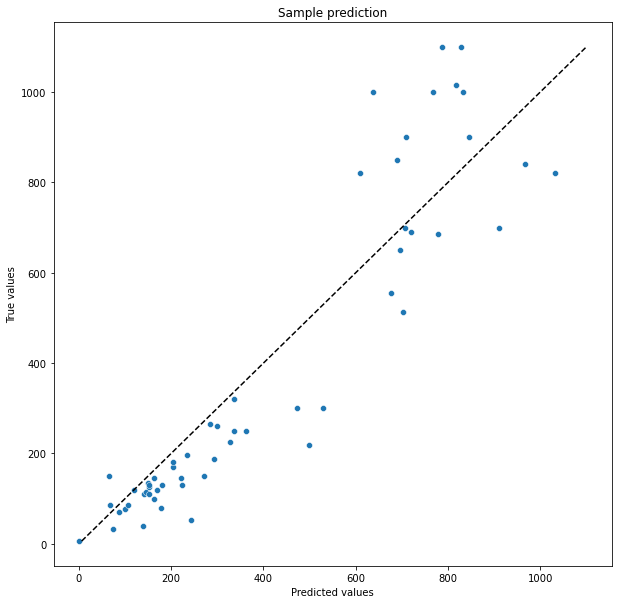

In [31]:
lr2 = LinearRegression(fit_intercept=False)
lr2.fit(X, y)
y_pred2 = lr2.predict(X)
evaluate_preds(y, y_pred2)

In [32]:
lr2.coef_

array([ 346.43036038, -353.66926772,   -4.16847367,  127.46915115,
         99.68280998])

**Выводы по линейной регрессии без интерсепта:**

- Мы получили следующую модель линейной регрессии: $$Weight=346.43\cdot Length1-353.67\cdot Length2-4.17\cdot Length3+127.47\cdot Height+99.68\cdot Width$$
- Оценочные значения веса рыбы при такой модели не противоречат здравому смыслу.
- Но при этом метрики линейной регрессии ухудшились - MSE увеличилось почти в 3 раза, а коэффициент детерминации упал до 0.85.

Предложение оптимизировать модель следующее: сделать постобработку результатов модели с интерсептом - все оценочные значения, меньшие минимального истинного значения приравнять минимальному истинному значению.

R2:	0.963
MSE:	4397.729


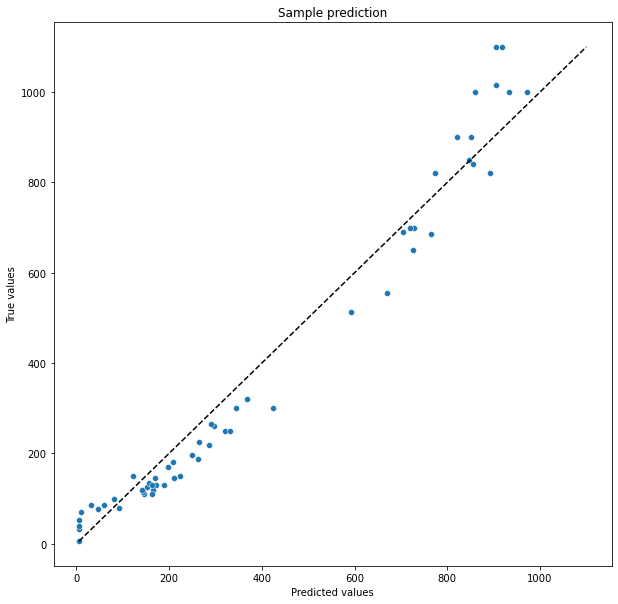

In [33]:
y_pred3 = y_pred.copy()
y_pred3 = pd.Series(y_pred3)
y_pred3.loc[y_pred3 < y.min()] = y.min()
y_pred3 = np.array(y_pred3)
evaluate_preds(y, y_pred3)

**Выводы по кастомной модели линейной регрессии с постобработкой:**

Как видим, модель с постобработкой дала самые лучшие метрики - MSE уменьшился почти в полтора раза, а коэффициент детерминации увеличился до 0.96

### Исследование модели линейной регрессии на статистическую значимость

In [34]:
n = len(df2.index) # число измерений
p = 6 # число параметров
# число степеней свободы:
dof1 = p - 1
dof2 = n - p
print(dof1, dof2)

5 50


In [35]:
# Объясненная фактическая сумма квадратных отклонений:
SSf = sum((y_pred3 - y.mean())**2)

# Остаточная сумма квадратных отклонений:
SSo = sum((y_pred3 - y)**2)

print(SSf, SSo)

5735759.620920578 246272.80776789732


In [36]:
# Суммы квадратных отклонений в расчете на одну степень свободы:
MSf = SSf/dof1
MSo = SSo/dof2
print(MSf, MSo)

1147151.9241841156 4925.456155357946


In [37]:
# Рассчитаем критерий Фишера Fp:
Fp = MSf/MSo
Fp

232.90267703149397

In [38]:
from scipy.stats import f
Ft = f.ppf(0.95, dof1, dof2)
Ft

2.400409127099287

In [39]:
p_value = 1 - f.cdf(Fp, dof1, dof2)
p_value

1.1102230246251565e-16

**Вывод:** тестирование модели на статистическую значимость показало, что найденная модель линейной регрессии статистически значима, т.к. Fp > Ft. Причем существенна значима, т.к. p_value практически равен 0.

Визуализируем тестирование гипотезы:

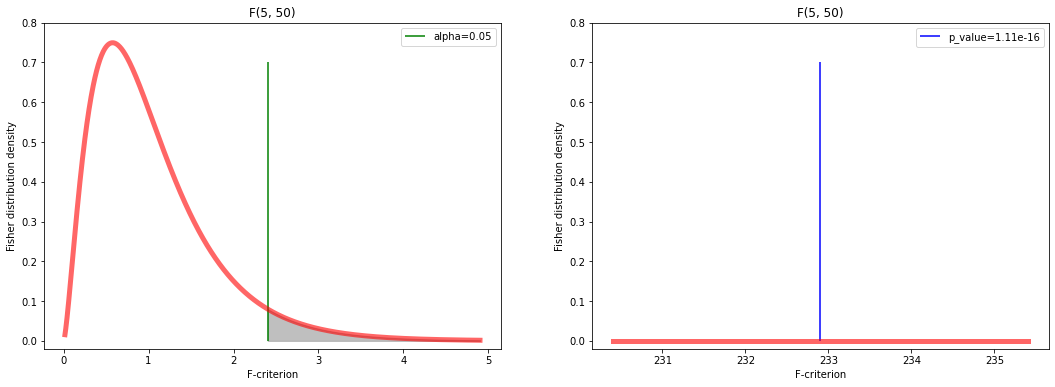

In [40]:
plt.figure(figsize=(18,6))

plt.subplot(121)
x1 = np.linspace(f.ppf(0.0001, dof1, dof2), f.ppf(0.999, dof1, dof2), 1000)
where = []
for itm in x1:
    if itm > Ft:
        where.append(True)
    else:
        where.append(False)
plt.plot(x1, f.pdf(x1, dof1, dof2), 'r-', lw=5, alpha=0.6)
plt.vlines(Ft, 0, 0.7, color='green', label='alpha=0.05')
plt.fill_between(x1, f.pdf(x1, dof1, dof2), 0, where=where, color='grey', alpha=0.5)
plt.ylim(-0.02, 0.8)
plt.xlabel('F-criterion')
plt.ylabel('Fisher distribution density')
plt.legend()
plt.title('F(5, 50)')

plt.subplot(122)
x2 = np.linspace(Fp-2.5, Fp+2.5, 1000)
plt.plot(x2, f.pdf(x2, dof1, dof2), 'r-', lw=5, alpha=0.6)
plt.vlines(Fp, 0, 0.7, color='blue', label='p_value=1.11e-16')
plt.ylim(-0.02, 0.8)
plt.xlabel('F-criterion')
plt.ylabel('Fisher distribution density')
plt.legend()
plt.title('F(5, 50)')

plt.show()

## 3. Однофакторный дисперсионный анализ

Проведем дисперсионный анализ для веса различных видов рыб. Для начала скомпануем в один словарь weights веса различных видов рыб:

In [41]:
weights = {}
for itm in df['Species'].value_counts().index:
    weights.update({itm: np.array(df.loc[df['Species'] == itm, 'Weight'])})
    
weights

{'Perch': array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
          85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
         130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
         225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
         265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
         685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
         900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ]),
 'Bream': array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
         500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
         610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
         714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.]),
 'Roach': array([ 40.,  69.,  78.,  87., 120.,   0., 110., 120., 150., 145., 160.,
        140., 160., 169., 161., 200., 180., 290., 272., 390.]),
 'Pike': array([ 200.,  300.,  300.,  300.,  430.,

**3.1. Проверка нормальности распределений значений групп**

Проверим тестом Шапиро-Уилка, следуют ли значения групп нормальному распределению с уровнем статистической значимости $\alpha=0.05$:

In [42]:
from scipy.stats import shapiro

weights_p_values = {}
for itm in weights.keys():
    _, p_value = shapiro(weights[itm])
    weights_p_values.update({itm: p_value})

weights_p_values

{'Perch': 7.342209755734075e-07,
 'Bream': 0.21692001819610596,
 'Roach': 0.17079131305217743,
 'Pike': 0.004033337812870741,
 'Smelt': 0.011288744397461414,
 'Parkki': 0.44043195247650146,
 'Whitefish': 0.16163107752799988}

Как видим, только 4 группы следуют нормальному распределению с уровнем статистической значимости $\alpha=0.05$: Bream, Roach, Parkki, Whitefish. Следовательно, в дальнейшем будем исследовать только эти группы. Удалим остальные группы из словаря weights:

In [43]:
delete_group = []
for itm in weights.keys():
    if weights_p_values[itm] < 0.05:
        delete_group.append(itm)

for itm in delete_group:
    weights.pop(itm)

weights

{'Bream': array([ 242.,  290.,  340.,  363.,  430.,  450.,  500.,  390.,  450.,
         500.,  475.,  500.,  500.,  340.,  600.,  600.,  700.,  700.,
         610.,  650.,  575.,  685.,  620.,  680.,  700.,  725.,  720.,
         714.,  850., 1000.,  920.,  955.,  925.,  975.,  950.]),
 'Roach': array([ 40.,  69.,  78.,  87., 120.,   0., 110., 120., 150., 145., 160.,
        140., 160., 169., 161., 200., 180., 290., 272., 390.]),
 'Parkki': array([ 55.,  60.,  90., 120., 150., 140., 170., 145., 200., 273., 300.]),
 'Whitefish': array([ 270.,  270.,  306.,  540.,  800., 1000.])}

Построим boxplots для этих групп:

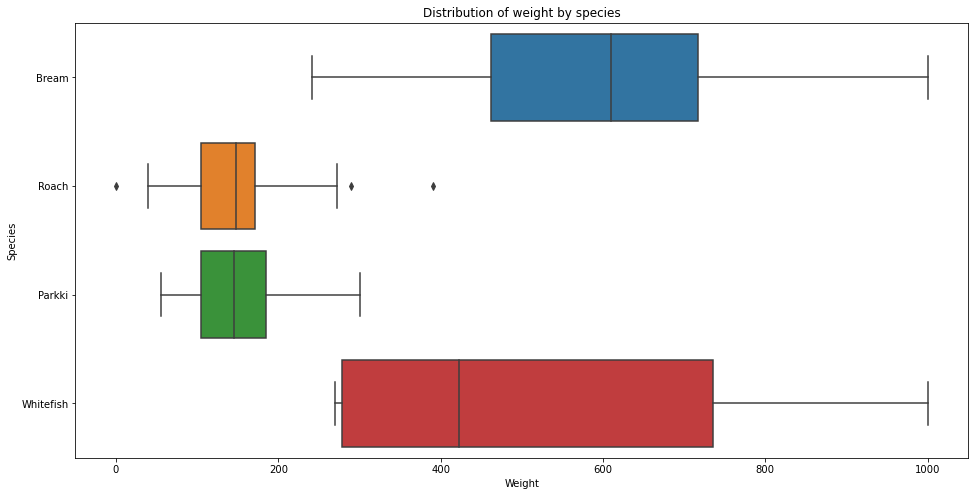

In [44]:
index = []
for itm in weights.keys():
    index.extend(df.loc[df.Species == itm].index)

plt.figure(figsize=(16, 8))
sns.boxplot(df.Weight.loc[index], df.Species.loc[index], whis=1.5)

plt.xlabel('Weight')
plt.ylabel('Species')
plt.title('Distribution of weight by species')
plt.show()

**3.2. Проверка однородности дисперсий**

Проверим для 4-х групп однородность дисперсий. Для исследования на однородность дисперсий обычно испольуется:

- G-критерий Кохрена - используется для сравнения 3-х и более выборок одинакового объема
- F-критерий Фишера для сравнения 2-х выборок

У нас выборки разного объема, поэтому G-критерий Кохрена использоватьн нельзя. Тогда используем F-критерий Фишера и попарно сравним каждую группу с каждой.

При проверки по критерию Фишера 
$$Fp=\frac{\sigma^{2}_{1}}{\sigma^{2}_{2}},$$

где $\sigma^{2}_{1}$ - большая из двух выборок дисперсия. При однородности дисперсий $Fp < Ft$

In [45]:
for itm in weights.keys():
    print(f'{itm}: {weights[itm].var()}')

Bream: 42516.542040816326
Roach: 7496.047500000001
Parkki: 5638.512396694216
Whitefish: 79878.33333333333


In [46]:
# Bream and Roach
print('Bream and Roach', 
      weights['Bream'].var()/weights['Roach'].var() < f.ppf(0.95, len(weights['Bream']), len(weights['Roach'])))

# Bream and Parkki
print('Bream and Parkki', 
      weights['Bream'].var()/weights['Parkki'].var() < f.ppf(0.95, len(weights['Bream']), len(weights['Parkki'])))

# Whitefish and Bream
print('Whitefish and Bream', 
      weights['Whitefish'].var()/weights['Bream'].var() < f.ppf(0.95, len(weights['Whitefish']), len(weights['Bream'])))

# Roach and Parkki
print('Roach and Parkki', 
      weights['Roach'].var()/weights['Parkki'].var() < f.ppf(0.95, len(weights['Roach']), len(weights['Parkki'])))

# Whitefish and Roach
print('Whitefish and Roach', 
      weights['Whitefish'].var()/weights['Roach'].var() < f.ppf(0.95, len(weights['Whitefish']), len(weights['Roach'])))

# Whitefish and Parkki
print('Whitefish and Parkki', 
      weights['Whitefish'].var()/weights['Parkki'].var() < f.ppf(0.95, len(weights['Whitefish']), len(weights['Parkki'])))

Bream and Roach False
Bream and Parkki False
Whitefish and Bream True
Roach and Parkki True
Whitefish and Roach False
Whitefish and Parkki False


Как видно, дисперсии однородны только у пар рыб: Whitefish and Bream и Roach and Parkki. Попарная однородность также визуально угадывается на boxplots. Тогда дисперсионный анализ будем проводить у двух пар рыб отдельно.

**3.3 Независимость групп**

Независимость групп доказывается, исходя из здравого смысла - вес рыб одного вида никак не влияет на вес рыб другого вида

Теперь проведем, собственно, сам дисперсионный анализ:

In [47]:
from scipy.stats import f_oneway

In [48]:
f_oneway(weights['Whitefish'], weights['Bream'])

F_onewayResult(statistic=0.7654978123704922, pvalue=0.3869699942563314)

In [49]:
f_oneway(weights['Roach'], weights['Parkki'])

F_onewayResult(statistic=0.007440907067891311, pvalue=0.9318520195011498)

**Выводы по дисперсионному анализу:**

Дисперсионный анализ среди двух пар рыб, Whitefish and Bream и Roach and Parkki, показал, что в обоих парах различие среднего веса статистически незначимо.